# Feb 2017 Analysis of Director Sentiment

## Setup

In [1]:
%matplotlib inline
from pattern.en import sentiment
from scipy import stats
import csv
import pandas as pd

CODE = 'ASX Code'
NAME = 'Company name'
SECTOR = 'Sector '
STATEMENT = 'Statement'
POLARITY = 'Polarity'
SUBJECTIVITY = 'Subjectivity'

COPY_FIELDS = [CODE, NAME, SECTOR]
FIELDNAMES = COPY_FIELDS + [POLARITY, SUBJECTIVITY]

IN16 = 'data/directors-reports-FEB2016-20170306.csv'
OUT16 = 'data/directors-reports-FEB2016-20170306-sentiment.csv'
IN17 = 'data/directors-reports-FEB2017-20170306.csv'
OUT17 = 'data/directors-reports-FEB2017-20170306-sentiment.csv'

## 2016 

### Read statements

In [2]:
with open(IN16) as ifh:
    r = csv.DictReader(ifh)
    comments16 = list(r)

### Calculate sentiment

In [3]:
sentiments16 = []
for c in comments16:
    row = {k:c[k] for k in COPY_FIELDS}
    s = c[STATEMENT].strip()
    row[POLARITY], row[SUBJECTIVITY] = sentiment(s) if s else (0.0,0.0)
    sentiments16.append(row)

/Users/benhachey/repos/convo-sentiment/env/lib/python2.7/site-packages/pattern/text/__init__.py:979: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  and tokens[j] in ("'", "\"", u"”", u"’", "...", ".", "!", "?", ")", EOS):
/Users/benhachey/repos/convo-sentiment/env/lib/python2.7/site-packages/pattern/text/__init__.py:1943: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if w in imap(lambda e: e.lower(), e):


### Save raw sentiment scores

In [4]:
with open(OUT16, 'wb') as ofh:
    w = csv.DictWriter(ofh, fieldnames=FIELDNAMES)
    w.writeheader()
    w.writerows(sentiments16)

### Make data frame

In [5]:
df16 = pd.DataFrame(sentiments16)
df16

,ASX Code,Company name,Polarity,Sector,Subjectivity
0,ABC,Adelaide Brighton,0.145556,Materials,0.406667
1,AGL,AGL Energy,-0.023611,Utilities,0.229861
2,AMC,AMCOR,0.200000,Materials,0.461111
3,AMP,AMP,0.217045,Insurance,0.471402
4,ANN,Ansell Ltd,0.000808,Health Care Equipment and Services,0.252966
5,APA,APA Group,0.117460,Utilities,0.565476
6,AWC,Alumina Ltd,-0.028125,Materials,0.221875
7,AZJ,Aurizon,0.101620,Transportation and Logistics,0.616667
8,BEN,Bendigo and Adelaide,0.345758,Banks and Diversified Financials,0.661818
9,BHP,BHP Billiton,0.034294,Materials,0.407688


### Overall descriptive statistics

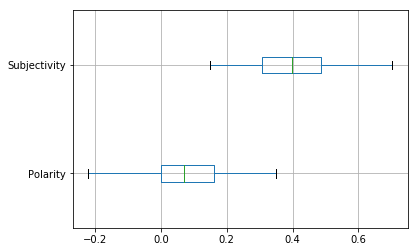

In [6]:
ax = df16[[POLARITY, SUBJECTIVITY]].boxplot(vert=False)

In [7]:
df16.describe()

,Polarity,Subjectivity
count,68.000000,68.000000
mean,0.085811,0.404494
std,0.123847,0.131229
min,-0.221212,0.150000
25%,0.000606,0.305815
50%,0.069240,0.397222
75%,0.161667,0.486174
max,0.350000,0.703333


### Descriptive statistics by sector

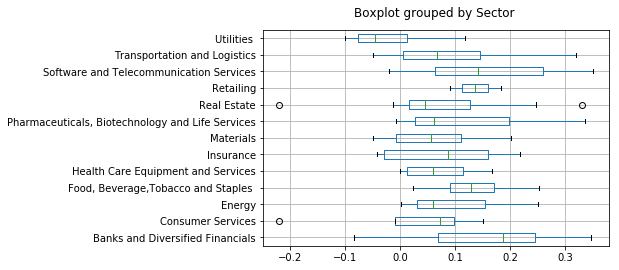

In [8]:
# Polarity boxplots grouped by sector
ax = df16[[SECTOR,POLARITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')

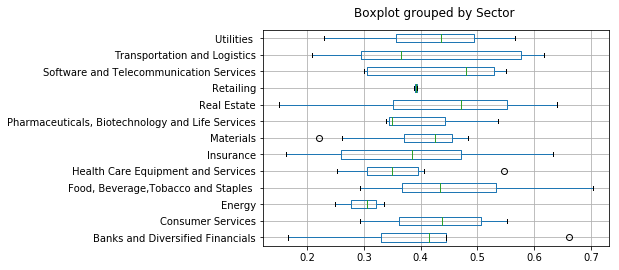

In [9]:
# Subjectivity boxplots grouped by sector
ax = df16[[SECTOR,SUBJECTIVITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')

In [10]:
for sector in df16[SECTOR].unique():
    print '{}\n'.format(sector)
    print df16[df16[SECTOR]==sector].describe()
    print '\n\n'

Materials

        Polarity  Subjectivity
count  11.000000     11.000000
mean    0.062018      0.395204
std     0.088828      0.085553
min    -0.050075      0.221875
25%    -0.008110      0.371552
50%     0.055620      0.425097
75%     0.109931      0.454518
max     0.201894      0.484091



Utilities 

       Polarity  Subjectivity
count  4.000000      4.000000
mean  -0.018895      0.416548
std    0.096171      0.141721
min   -0.100000      0.229861
25%   -0.077072      0.357465
50%   -0.046520      0.435428
75%    0.011657      0.494511
max    0.117460      0.565476



Insurance

       Polarity  Subjectivity
count  5.000000      5.000000
mean   0.078564      0.382561
std    0.114098      0.183011
min   -0.041667      0.163095
25%   -0.029762      0.260000
50%    0.087205      0.384975
75%    0.160000      0.471402
max    0.217045      0.633333



Health Care Equipment and Services

       Polarity  Subjectivity
count  6.000000      6.000000
mean   0.069039      0.366684
std    0.067

### Does sentiment differ by sector?

No: The null hypothesis that medians of all groups are equal is not rejected using the Kruskal-Wallis H-test.

In [11]:
polarities_by_sector = [df16[df16[SECTOR]==sector][POLARITY] for sector in df16[SECTOR].unique()]
stats.kruskal(*polarities_by_sector)

KruskalResult(statistic=8.46743639757414, pvalue=0.74761874644858073)

In [12]:
subjectivities_by_sector = [df16[df16[SECTOR]==sector][SUBJECTIVITY] for sector in df16[SECTOR].unique()]
stats.kruskal(*subjectivities_by_sector)

KruskalResult(statistic=4.7871907608632887, pvalue=0.96471168532216056)

### Print words for some interesting companies

In [13]:
def iter_words(statement):
    print 'Key words from analysis:'
    for words, polarity, subjectivity, label in sentiment(statement).assessments:
        print '  {:20} (p:{:.3f}, s:{:.3f})'.format(' '.join(words), polarity, subjectivity)
        yield ' '.join(words), polarity, subjectivity

def print_words(code, comments, year='2016'):
    print '{}\n'.format(code)
    for c in comments:
        if c[CODE] == code:
            print '{}\n'.format(c[STATEMENT])
            f = 'data/example-FEB{}-{}.csv'.format(year, code)
            with open(f, 'w') as fh:
                w = csv.writer(fh)
                w.writerows(iter_words(c[STATEMENT]))
            print '\n\n'
            break

In [14]:
EXAMPLES16 = [
    'AMC', # AMCOR - high Materials sentiment of 0.200
    'ABC', # Adelaide Brighton - high Materials sentiment of 0.146
    'RIO', # Rio Tinto - low Materials sentiment of -0.033
    'S32', # South32 - low Materials sentiment of -0.050
    'GPT', # GPT - high Real Estate sentiment of 0.330
    'MGR', # Mirvac - high Real Estate sentiment of 0.247
    'SGP', # Stockland - low Real Estate sentiment of -0.013
    'SCG', # Scentre - low Real Estate sentiment of -0.221
]
for example in EXAMPLES16:
    print_words(example, comments16)

AMC

The full year outlook is for higher earnings than the 2014/15 year, expressed in constant currency terms

Key words from analysis:
  full                 (p:0.350, s:0.550)
  higher               (p:0.250, s:0.500)
  constant             (p:0.000, s:0.333)



ABC

Mr Brydon said the Company expects sales volume of cement and clinker to be slightly higher in 2016. Sales volumes of premixed concrete, aggregates, concrete products and lime are also expected to increase. Prices rises are expected for all of Adelaide Brighton’s products in 2016 and increases are expected to exceed those achieved last year in cement, clinker, aggregates, concrete and concrete products. Efficiency remains a key operational priority as part of the rolling program of cost reduction to sustain leading margins and shareholder returns. It is now estimated that remaining land parcels could realise in excess of $140 million in proceeds over the next decade and $30-40 million in the next two years. Adelaide Brig

## 2017 

### Read statements

In [15]:
with open(IN17) as ifh:
    r = csv.DictReader(ifh)
    comments17 = list(r)

### Calculate sentiment

In [16]:
sentiments17 = []
for c in comments17:
    row = {k:c[k] for k in COPY_FIELDS}
    s = c[STATEMENT].strip()
    row[POLARITY], row[SUBJECTIVITY] = sentiment(s) if s else (0.0,0.0)
    sentiments17.append(row)

### Save raw sentiment scores

In [17]:
with open(OUT17, 'wb') as ofh:
    w = csv.DictWriter(ofh, fieldnames=FIELDNAMES)
    w.writeheader()
    w.writerows(sentiments17)

### Make data frame

In [18]:
df17 = pd.DataFrame(sentiments17)
df17

,ASX Code,Company name,Polarity,Sector,Subjectivity
0,ABC,Adelaide Brighton,0.110923,Materials,0.438514
1,AGL,AGL Energy,0.053472,Utilities,0.332639
2,AMC,AMCOR,0.150000,Materials,0.377778
3,AMP,AMP,0.145179,Insurance,0.409091
4,ANN,Ansell Ltd,0.145536,Health Care Equipment and Services,0.367560
5,APA,APA Group,0.076389,Utilities,0.488657
6,ASX,ASX,0.073554,Banks and Diversified Financials,0.459919
7,AWC,Alumina Ltd,0.087500,Materials,0.304167
8,AZJ,Aurizon,0.167018,Transportation and Logistics,0.367039
9,BEN,Bendigo and Adelaide,0.147826,Banks and Diversified Financials,0.385926


### Overall descriptive statistics

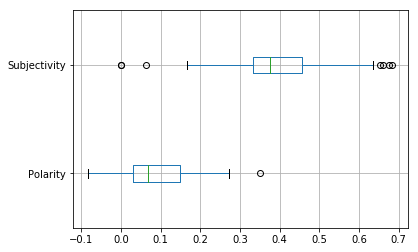

In [19]:
ax = df17[[POLARITY, SUBJECTIVITY]].boxplot(vert=False)

In [20]:
df17.describe()

,Polarity,Subjectivity
count,76.000000,76.000000
mean,0.087243,0.390076
std,0.092082,0.130285
min,-0.083333,0.000000
25%,0.029590,0.332614
50%,0.067857,0.376389
75%,0.148370,0.457593
max,0.350000,0.684375


### Descriptive statistics by sector

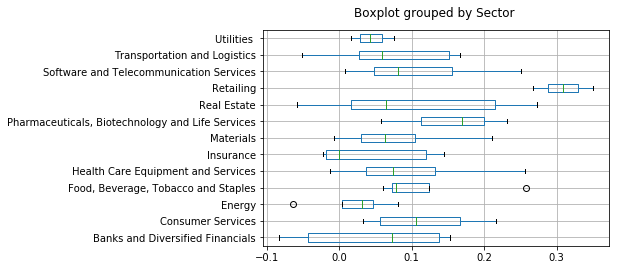

In [21]:
# Polarity boxplots grouped by sector
ax = df17[[SECTOR,POLARITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')

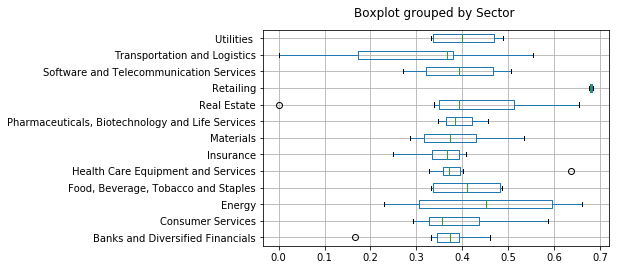

In [22]:
# Subjectivity boxplots grouped by sector
ax = df17[[SECTOR,SUBJECTIVITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')

In [23]:
for sector in df17[SECTOR].unique():
    print '{}\n'.format(sector)
    print df17[df17[SECTOR]==sector].describe()
    print '\n\n'

Materials

        Polarity  Subjectivity
count  13.000000     13.000000
mean    0.072474      0.381010
std     0.060580      0.077627
min    -0.006667      0.286667
25%     0.030579      0.317080
50%     0.063886      0.374306
75%     0.104369      0.429786
max     0.211174      0.534747



Utilities 

       Polarity  Subjectivity
count  4.000000      4.000000
mean   0.044826      0.405231
std    0.025934      0.081497
min    0.016406      0.332639
25%    0.028878      0.336675
50%    0.043254      0.399814
75%    0.059201      0.468370
max    0.076389      0.488657



Insurance

       Polarity  Subjectivity
count  5.000000      5.000000
mean   0.044983      0.350400
std    0.080698      0.063617
min   -0.022078      0.248810
25%   -0.017716      0.333683
50%    0.000000      0.366667
75%    0.119531      0.393750
max    0.145179      0.409091



Health Care Equipment and Services

       Polarity  Subjectivity
count  6.000000      6.000000
mean   0.095220      0.410759
std    0.095

### Does sentiment differ by sector?

No: The null hypothesis that medians of all groups are equal is not rejected using the Kruskal-Wallis H-test.

In [24]:
polarities_by_sector = [df17[df17[SECTOR]==sector][POLARITY] for sector in df16[SECTOR].unique()]
stats.kruskal(*polarities_by_sector)

KruskalResult(statistic=nan, pvalue=nan)

In [25]:
subjectivities_by_sector = [df17[df17[SECTOR]==sector][SUBJECTIVITY] for sector in df17[SECTOR].unique()]
stats.kruskal(*subjectivities_by_sector)

KruskalResult(statistic=8.9137592063338609, pvalue=0.71027837453945253)

### Print words for some interesting companies

In [26]:
EXAMPLES17 = [
    'AMC', # AMCOR - high Materials sentiment for 2016
    'ABC', # Adelaide Brighton - high Materials sentiment for 2016
    'RIO', # Rio Tinto - low Materials sentiment for 2016
    'S32', # South32 - low Materials sentiment for 2016
    'GPT', # GPT - high Real Estate sentiment for 2016
    'MGR', # Mirvac - high Real Estate sentiment for 2016
    'SGP', # Stockland - low Real Estate sentiment for 2016
    'SCG', # Scentre - low Real Estate sentiment for 2016
]
for example in EXAMPLES17:
    print_words(example, comments17, year='2017')

AMC

“The Company is very well positioned for continued growth and the outlook for profit after tax in the
2016/17 year has not changed. In constant currency terms, we expect profit after tax to be higher than
the US$671.1 million delivered in the 2015/16 year.” 

Key words from analysis:
  very                 (p:0.200, s:0.300)
  constant             (p:0.000, s:0.333)
  higher               (p:0.250, s:0.500)



ABC

Mr Brydon said that, for the 2017 full year, the Company expects sales volumes of cement and
clinker to be higher to those achieved in 2016.
It is expected that demand in Western Australia and the Northern Territory will stabilise and that
demand in South Australia will improve due to major infrastructure projects.
Cement and clinker demand on the east coast is expected to benefit from increasing demand from
infrastructure projects. Sales volumes of premixed concrete and aggregates are likely to increase
this year due to infrastructure projects on the east coast and Sou

## Compare across years

### Overall subjectivity and polarity

(-1, 1)

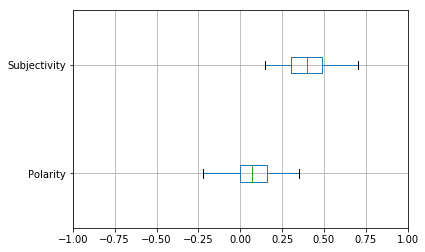

In [27]:
ax = df16[[POLARITY, SUBJECTIVITY]].boxplot(vert=False)
ax.set_xlim(-1,1)

(-1, 1)

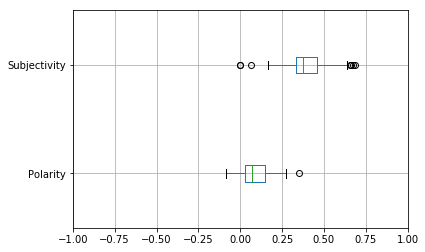

In [28]:
ax = df17[[POLARITY, SUBJECTIVITY]].boxplot(vert=False)
ax.set_xlim(-1,1)

### Polarity by sector

(-1, 1)

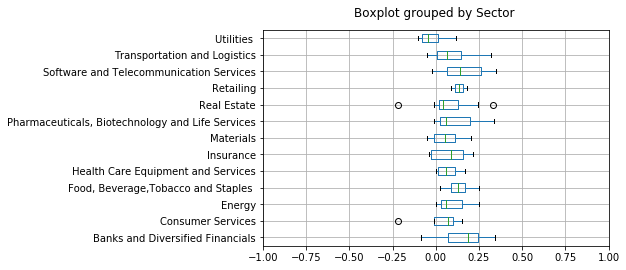

In [29]:
# Polarity boxplots grouped by sector
ax = df16[[SECTOR,POLARITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')
ax.set_xlim(-1,1)

(-1, 1)

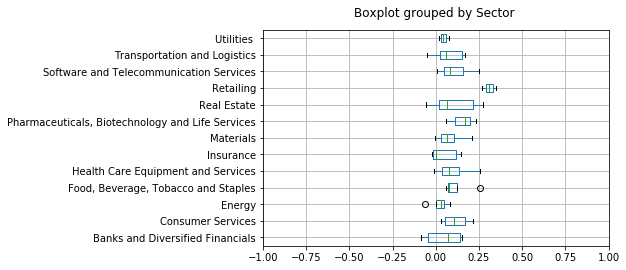

In [30]:
# Polarity boxplots grouped by sector
ax = df17[[SECTOR,POLARITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')
ax.set_xlim(-1,1)

### Subjectivity by sector

(0, 1)

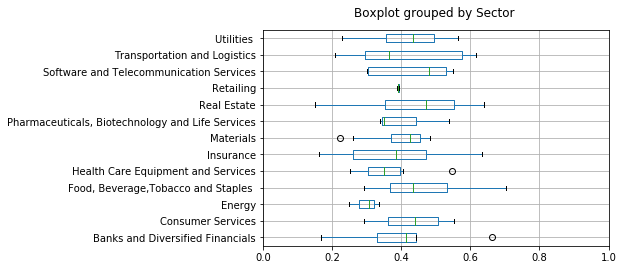

In [31]:
# Polarity boxplots grouped by sector
ax = df16[[SECTOR,SUBJECTIVITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')
ax.set_xlim(0,1)

(0, 1)

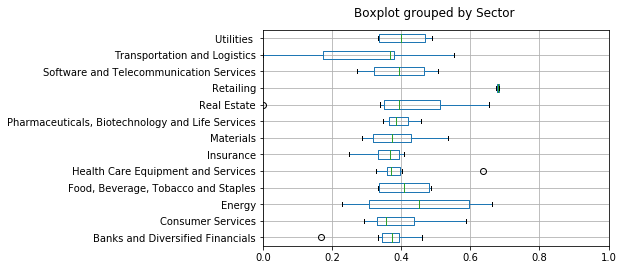

In [32]:
# Polarity boxplots grouped by sector
ax = df17[[SECTOR,SUBJECTIVITY]].boxplot(by=SECTOR, vert=False)
ax.set_xlabel('')
ax.set_title('')
ax.set_xlim(0,1)

### Do polarity and sentiment differ across years?

No. The null hypothesis that means/medians are identical is not rejected using t-test/Mann-Whitney.

In [33]:
print stats.ttest_ind(df16[POLARITY], df17[POLARITY])
print stats.mannwhitneyu(df16[POLARITY], df17[POLARITY], alternative='two-sided')

Ttest_indResult(statistic=-0.079234719300832104, pvalue=0.93695748066613471)
MannwhitneyuResult(statistic=2545.0, pvalue=0.87755423259312049)


In [34]:
print stats.ttest_ind(df16[SUBJECTIVITY], df17[SUBJECTIVITY])
print stats.mannwhitneyu(df16[SUBJECTIVITY], df17[SUBJECTIVITY], alternative='two-sided')

Ttest_indResult(statistic=0.66069699788322334, pvalue=0.50987707910358615)
MannwhitneyuResult(statistic=2730.0, pvalue=0.5603973533061376)
